**Time-frequency decomposition using wavelets**

In this notebook, we’ll explore wavelet analysis for seismic data, which is useful for non-stationary signals like seismic waves. The scalogram is a graphical representation of the wavelet transform that allows us to examine the signal's frequency content over time.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
from obspy.clients.fdsn import Client
from obspy.core import UTCDateTime


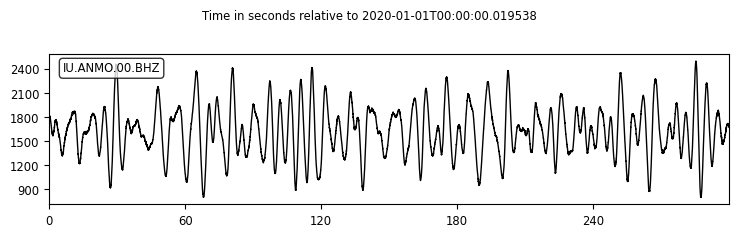

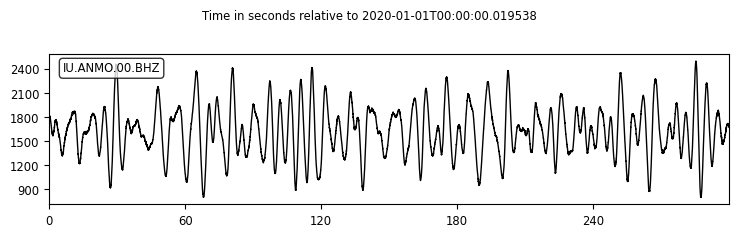

In [2]:
#loading IRIS data
# Connect to the IRIS FDSN client
client = Client("IRIS")

# Define the time period for the data (5 minutes)
starttime = UTCDateTime("2020-01-01T00:00:00")
endtime = starttime + 5 * 60  # 5 minutes

# Fetch waveform data: IU network, ANMO station, BHZ channel
st = client.get_waveforms(network="IU", station="ANMO", location="00", channel="BHZ",
                          starttime=starttime, endtime=endtime)

# Plot the original waveform
st.plot(type="relative", title="Raw Seismic Waveform - IU.ANMO.BHZ")

Perform Wavelet Transform:
I will be using Continuous Wavelet Transform (CWT) for analyzing the seismic signal over time and frequency. I'll use the Morlet wavelet, which is commonly used in seismic signal analysis.

In [5]:
# Select the first trace from the stream
tr = st[0]

# Define the wavelet function (Morlet)
wavelet = 'cmor1.5-1.0'

# Perform the CWT: this returns the wavelet coefficients and the corresponding frequencies
coefficients, frequencies = pywt.cwt(tr.data, np.arange(1, 100), wavelet, 1/tr.stats.sampling_rate)

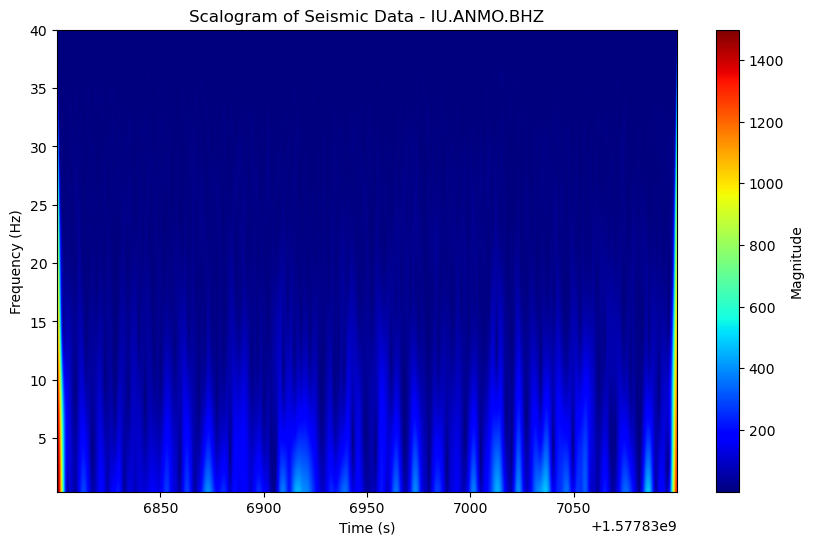

In [6]:
#plotting the Scalogram
# Plot the scalogram
plt.figure(figsize=(10, 6))
plt.imshow(np.abs(coefficients), aspect='auto', extent=[tr.stats.starttime.timestamp, tr.stats.endtime.timestamp, frequencies[-1], frequencies[0]], cmap='jet', interpolation='bilinear')
plt.colorbar(label='Magnitude')
plt.title('Scalogram of Seismic Data - IU.ANMO.BHZ')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()


np.arange(1, 100) defines the frequency range. You can adjust this depending on the signal's characteristics.  
np.abs(coefficients) is used to plot the magnitude of the coefficients (real and imaginary parts combined).

The scalogram will give you insight into how the frequency components of the signal evolve over time.